# Agrupando Filmes Pela Sinopse

## Colaboração

Caio Alves, Fiorotti, Matheus Meier Schreiber, Vinicius Cole de Amorim

## Desenvolvimento

### Pré-processamento dos dados textuais


Vamos começar carregando os dados de entrada em um `DataFrame`.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg' -O filmes.csv
import pandas as pd
df = pd.read_csv("filmes.csv")

# Amostrar todo o DataFrame para garantir consistência
df = df.sample(frac=0.10)

# Pegando apenas as sinopses
sinopses = df['sinopse']

--2025-02-16 13:39:12--  https://docs.google.com/uc?export=download&id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg
Resolving docs.google.com (docs.google.com)... 74.125.132.139, 74.125.132.100, 74.125.132.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.132.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg&export=download [following]
--2025-02-16 13:39:12--  https://drive.usercontent.google.com/download?id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.201.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11380332 (11M) [application/octet-stream]
Saving to: ‘filmes.csv’

filmes.csv          100%[===================>]  10.85M  58.2MB/s    in 0.

Agora vamos passar para a limpeza e o pré-processamento em si, seguindo os seguintes passos:
1. Dividir o texto em *tokens*
2. Converter o texto para letras minúsculas
3. Remover símbolos de pontuação de cada *token*
4. Converter caracteres especiais
5. Remover *tokens* que não são palavras
6. Remover *tokens* que são *stop words*
7. Stemming

#### 1. Dividindo as sinopses em sentenças e palavras

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Separando cada sinopse em sentenças
sentences_list = [sent_tokenize(sinopse) for sinopse in sinopses]

In [ ]:
# Separando cada sinopse em tokens
tokens_list = [word_tokenize(sinopse) for sinopse in sinopses]

#### 2. Convertendo o texto para letras minúsculas

In [ ]:
tokens_list = [[w.lower() for w in tokens] for tokens in tokens_list]

#### 3. Removendo símbolos de pontuação de cada *token*

In [ ]:
import string

In [ ]:
table = str.maketrans('', '', string.punctuation)
tokens_list = [[w.translate(table) for w in tokens] for tokens in tokens_list]

#### 4. Conversão caracteres especiais

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
import unidecode

In [ ]:
tokens_list = [[unidecode.unidecode(w) for w in tokens] for tokens in tokens_list]

#### 5. Removendo *tokens* que não são palavras

In [ ]:
words_list = [[w for w in tokens if w.isalpha()] for tokens in tokens_list]

#### 6. Removendo *tokens* que são *stop words*

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Carregando as stop words da língua inglesa
stop_words = set(stopwords.words('english'))

In [ ]:
words_list = [[w for w in words if not w in stop_words] for words in words_list]

#### 7. Stemming

O processo de stemming é a redução das palavras aos seus redicais. Exemplo
- Changing -> Chang
- Change -> Chang
- Changed ->  Chang

In [ ]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [ ]:
stemmed_words_list = [[porter.stem(w) for w in words] for words in words_list]

### Construção da matriz de TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Juntando as palavras processadas para gerar uma lista de documentos D
D = [' '.join(words) for words in stemmed_words_list]

In [ ]:
vectorizer = TfidfVectorizer(min_df = 5, max_df = 0.9) # unigrama

# Gerando a matriz TF-IDF X a partir de D
X = vectorizer.fit_transform(D)

# Transformando a matriz TF-IDF em um Dataframe
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(X_df.shape)
X_df.head()

(3036, 2112)


abandon  abduct  abil  abl  aboard  abus  academi  accept  accid  accident  \
0      0.0     0.0   0.0  0.0     0.0   0.0      0.0     0.0    0.0       0.0   
1      0.0     0.0   0.0  0.0     0.0   0.0      0.0     0.0    0.0       0.0   
2      0.0     0.0   0.0  0.0     0.0   0.0      0.0     0.0    0.0       0.0   
3      0.0     0.0   0.0  0.0     0.0   0.0      0.0     0.0    0.0       0.0   
4      0.0     0.0   0.0  0.0     0.0   0.0      0.0     0.0    0.0       0.0   

   ...  wwii  yacht  yakuza  year  yet  york  young  younger  youth  zombi  
0  ...   0.0    0.0     0.0   0.0  0.0   0.0    0.0      0.0    0.0    0.0  
1  ...   0.0    0.0     0.0   0.0  0.0   0.0    0.0      0.0    0.0    0.0  
2  ...   0.0    0.0     0.0   0.0  0.0   0.0    0.0      0.0    0.0    0.0  
3  ...   0.0    0.0     0.0   0.0  0.0   0.0    0.0      0.0    0.0    0.0  
4  ...   0.0    0.0     0.0   0.0  0.0   0.0    0.0      0.0    0.0    0.0  

[5 rows x 2112 columns]

### Redução de dimensionalidade


Para a redução da dimensionalidade, vamos utilizar o algoritmo **Truncated SVD**.

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Escolhendo um número de componentes inicial alto
truncated_svd = TruncatedSVD(n_components=2112)
truncated_svd.fit(X_df)

TruncatedSVD(n_components=2112)

A partir de um número de componentes inicial alto, vamos analisar a variância acumulada para descobrir um número de componentes satifatório.

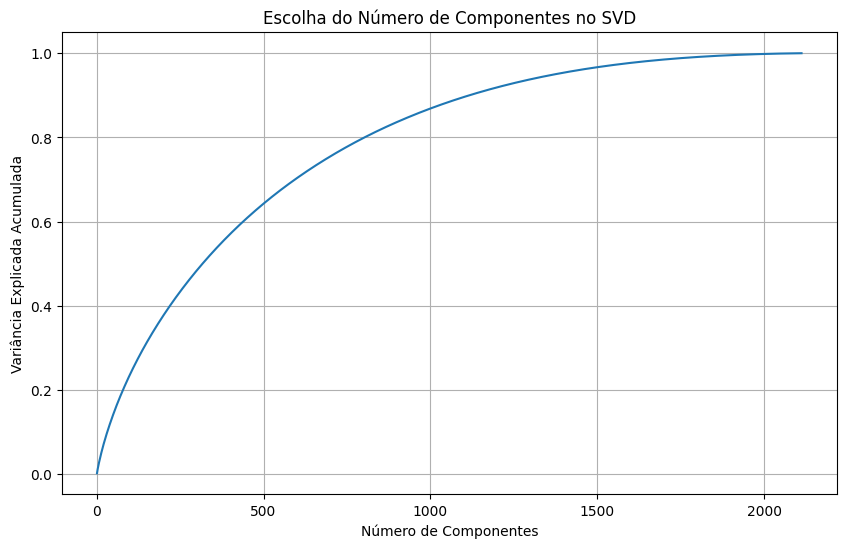

In [ ]:
# Plotar a variância explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1, truncated_svd.n_components + 1)], np.cumsum(truncated_svd.explained_variance_ratio_))
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Escolha do Número de Componentes no SVD")
plt.grid()
plt.show()

Podemos encontrar um número de componentes que cobre cerca de 90%-95% da variância matematicamente:

In [ ]:
ac = np.cumsum(truncated_svd.explained_variance_ratio_)

# Encontra o menor número de componentes que cobre pelo menos 90% da variância
n_components = np.argmax(ac >= 0.9) + 1

print(n_components)

1117


Agora, normalizaremos a matriz tfidf depois de passar pelo svd

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

truncated_svd = TruncatedSVD(n_components=n_components)
X_not_normalized = truncated_svd.fit_transform(X_df)
scaler = MinMaxScaler()
X = scaler.fit_transform(X_not_normalized)

### Aplicação dos algoritmos de agrupamento

#### Algoritmo 1

O primeiro algoritmo utilizado será o **k-means**.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Vamos primeiro (tentar) descobrir o número de clusters ideal, analisando o gráfico do cotovelo (ou joelho) e o gráfico do coeficiente de silhueta.

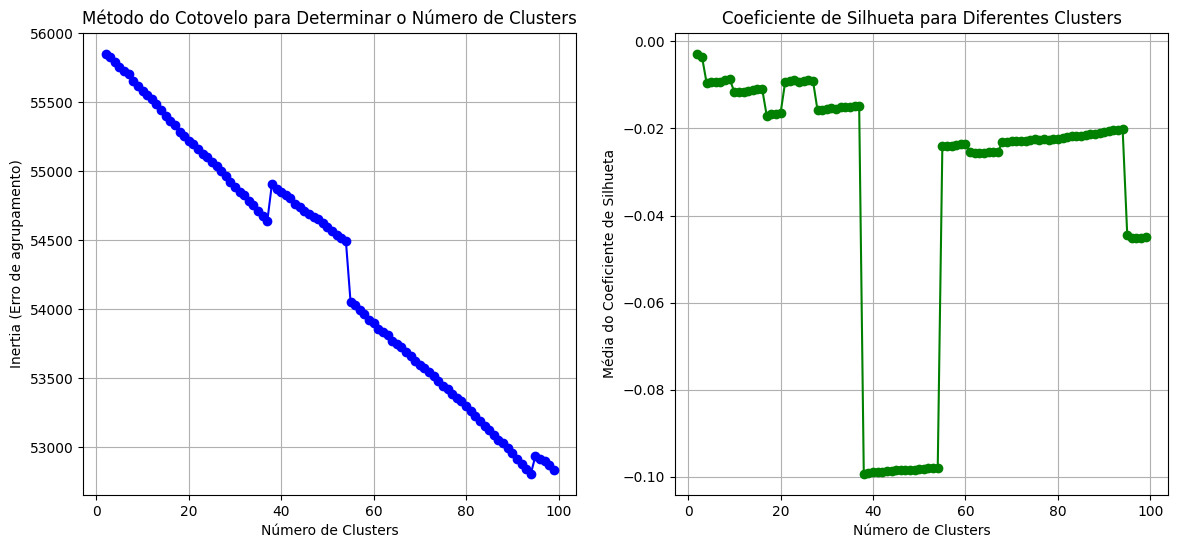

In [ ]:
inertia = [] # Erro de agrupamento
silhouette_scores = []

for k in range(2, 100):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(range(2, 100), inertia, marker='o', color='b')
ax[0].set_title("Método do Cotovelo para Determinar o Número de Clusters")
ax[0].set_xlabel("Número de Clusters")
ax[0].set_ylabel("Inertia (Erro de agrupamento)")
ax[0].grid()

ax[1].plot(range(2, 100), silhouette_scores, marker='o', color='g')
ax[1].set_title("Coeficiente de Silhueta para Diferentes Clusters")
ax[1].set_xlabel("Número de Clusters")
ax[1].set_ylabel("Média do Coeficiente de Silhueta")
ax[1].grid()

plt.show()

Com esse gráfico em mãos, parte-se para a obtenção do valor ideal de $k$. Esse valor é obtido/aproximado, por meio da seguinte metodologia:

>*$k$ é o número de clusters associado ao ponto da curva mais distante de uma reta traçada entre o primeiro e o último ponto do gráfico.*

Analisando o gráfico, observa-se que é bem difícil de levantar um valor ideal para o número de clusters pois, a olho nu, não é trivial encontrar um ponto mais longe. Portanto, faz-se uso da matemática e da geometria para se encontrar esse valor.

*Obs.: Parte do código a seguir foi inspirada [neste artigo](https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9)*

In [ ]:
import math

# funcao para calcular o within-clusters sum-of-squares (wcss)
def calc_wcss(data):
    wcss = list()
    for n in range(2, 100):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=X)
        wcss.append(kmeans.inertia_) # o KMeans apelida o wcss como 'inertia'

    return wcss

# funcao para calcular o k
def calc_num_clusters_otimo(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 100, wcss[len(wcss)-1]

    dists = list()
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        num = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        den = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        dists.append(num/den)

    return dists.index(max(dists)) + 2

# calculando a soma dos quadrados para o intervalo de 2 a 100 clusters
ss = calc_wcss(df)

# calculando a quantidade ótima de clusters
optimal_k = calc_num_clusters_otimo(ss)
optimal_k

98

Dessa forma, busca-se os clusters usando o numero ótimo calculado acima.


In [ ]:
kmeans = KMeans(n_clusters=optimal_k)
clusters = kmeans.fit_predict(X)

Para cada cluster apontado pelo *KMeans*, vamos analisar a distribuição dos gêneros dos filmes presentes dentro deles.

<Figure size 1400x800 with 0 Axes>

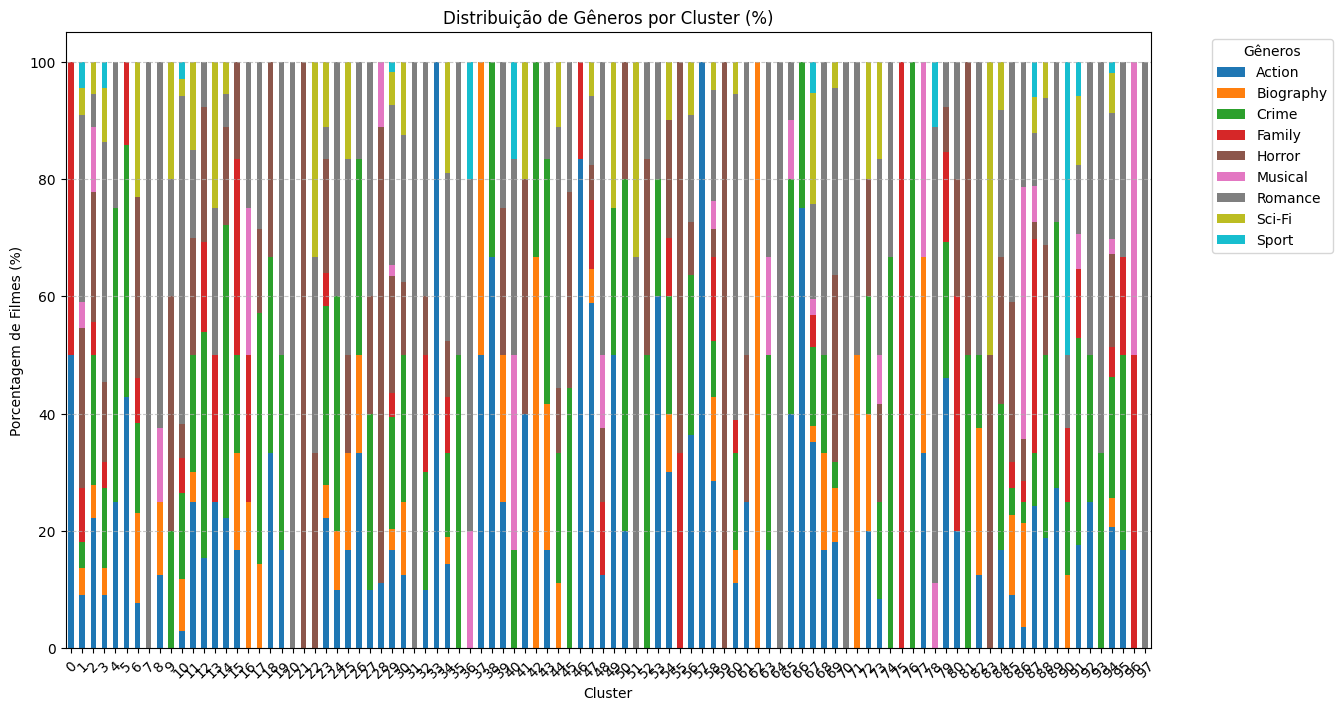

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Garantir que os gêneros sejam tratados corretamente como listas
df_genres = df['genres'].fillna("").apply(lambda x: x.split(',')) # Divide os gêneros por ','

# Criar colunas binárias para cada gênero usando MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df_genres), columns=mlb.classes_)

# Converter X de volta para DataFrame e junta com os generos
new_X_df = pd.DataFrame(X)
new_X_df = pd.concat([new_X_df, genres_encoded], axis=1)

def normalized_bars_plot(clusters):

  # Juntando o DF principal com os clusters gerados
  new_X_df['cluster'] = clusters

  # Contar a ocorrência de cada gênero dentro de cada cluster
  genre_cluster_distribution = new_X_df.groupby('cluster')[mlb.classes_].sum()

  # Normalizar os valores para que a soma de cada cluster seja 100%
  genre_cluster_distribution_normalized = genre_cluster_distribution.div(genre_cluster_distribution.sum(axis=1), axis=0) * 100

  # Plotar o gráfico
  plt.figure(figsize=(14, 8))
  genre_cluster_distribution_normalized.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="tab10")
  plt.title("Distribuição de Gêneros por Cluster (%)")
  plt.xlabel("Cluster")
  plt.ylabel("Porcentagem de Filmes (%)")
  plt.legend(title="Gêneros", bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.xticks(rotation=45)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

normalized_bars_plot(clusters)

Podemos fazer também algumas avaliações analíticas do nosso agrupamento. Vamos usar o qui-quadrado para testar se há associação entre clusters e gêneros.

In [ ]:
from scipy.stats import chi2_contingency

df_genres = df['genres'].fillna("").apply(lambda x: x.split(','))
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df_genres), columns=mlb.classes_)
new_X_df = pd.DataFrame(X)
new_X_df = pd.concat([new_X_df, genres_encoded], axis=1)
new_X_df['cluster'] = clusters
genre_cluster_distribution = new_X_df.groupby('cluster')[mlb.classes_].sum()
genre_cluster_distribution_normalized = genre_cluster_distribution.div(genre_cluster_distribution.sum(axis=1), axis=0) * 100
chi2, p, _, _ = chi2_contingency(genre_cluster_distribution)
print(f"Teste qui-quadrado: chi2={chi2:.2f}, p={p:.4f}")

if p < 0.05:
    print("Os clusters têm distribuições de gêneros significativamente diferentes!")
else:
    print("Os clusters NÃO têm distribuições de gêneros significativamente diferentes.")

Teste qui-quadrado: chi2=1269.18, p=0.0000
Os clusters têm distribuições de gêneros significativamente diferentes!


Como observado, esse um número de clusters calculado não faz muito sentido com o contexto que estamos analisando. Sendo assim, vamos começar a diminuir esse número, abaixando para mais ou menos metade do seu valor e testar o algoritmo novamente.

In [ ]:
optimal_k = 38

kmeans = KMeans(n_clusters=optimal_k)
clusters = kmeans.fit_predict(X)
print(len(set(clusters)))  # Número de clusters distintos

38


<Figure size 1400x800 with 0 Axes>

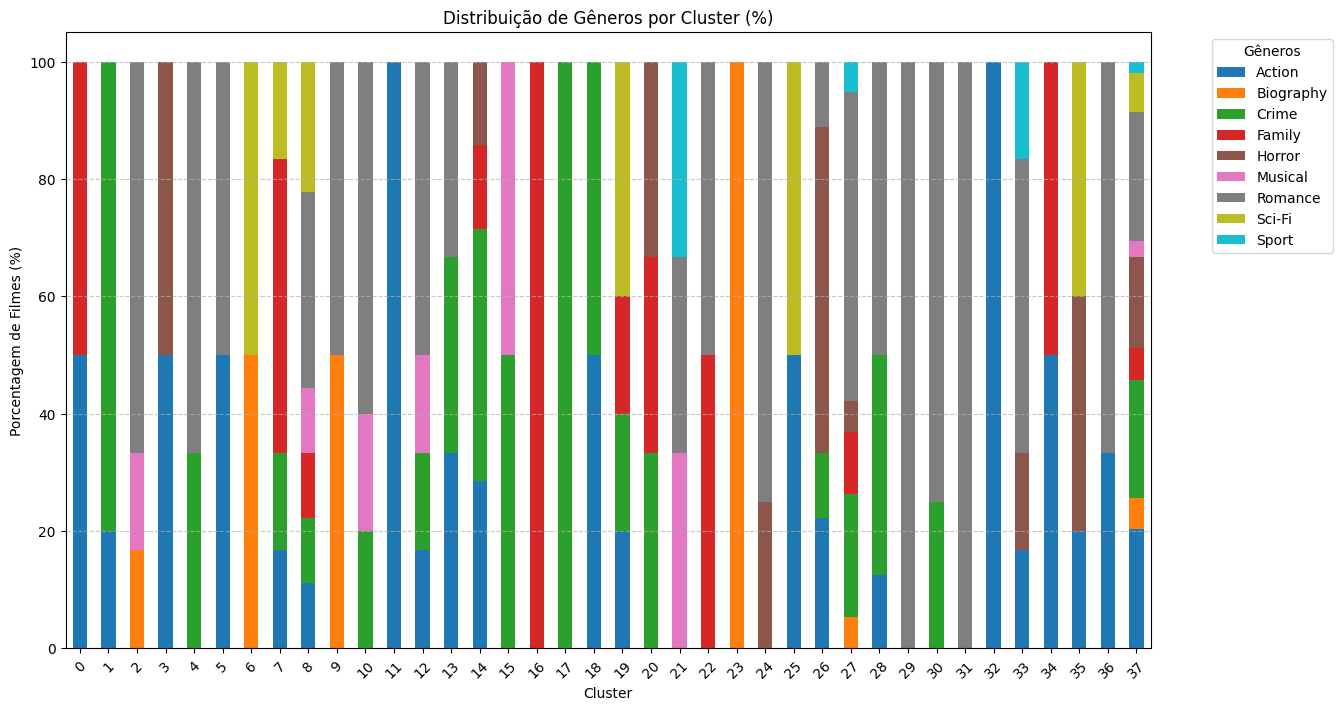

In [ ]:
normalized_bars_plot(clusters)

O número de clusters ainda está muito alto, vamos diminuir para um número menor ainda ($k = 12$)

In [ ]:
optimal_k = 12

kmeans = KMeans(n_clusters=optimal_k)
clusters_kmeans = kmeans.fit_predict(X)
print(len(set(clusters_kmeans)))  # Número de clusters distintos

12


<Figure size 1400x800 with 0 Axes>

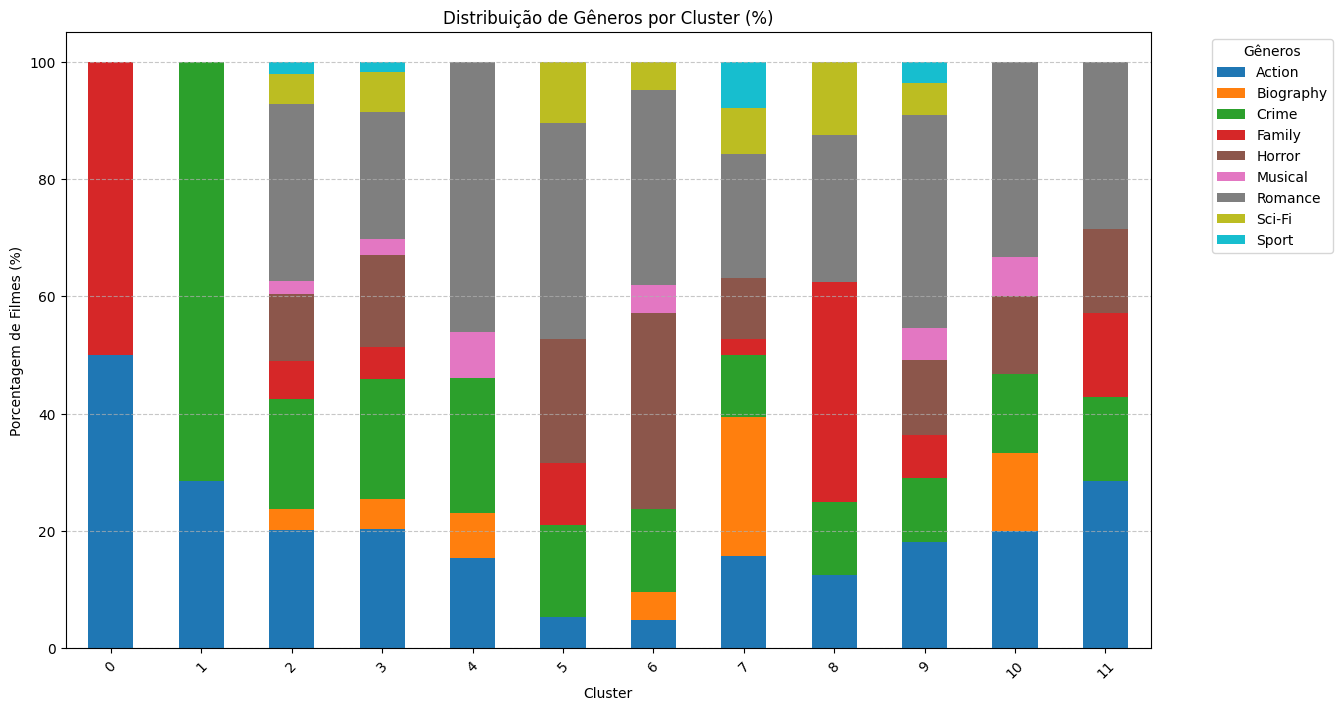

In [ ]:
normalized_bars_plot(clusters_kmeans)

Outro plot interessante de se observar, é a *word cloud*, ou seja, nuvem de palavras. Portanto, faremos esse plot com os clusters gerados no agrupamento do KMeans.

In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.7 MB/s eta 0:00:00


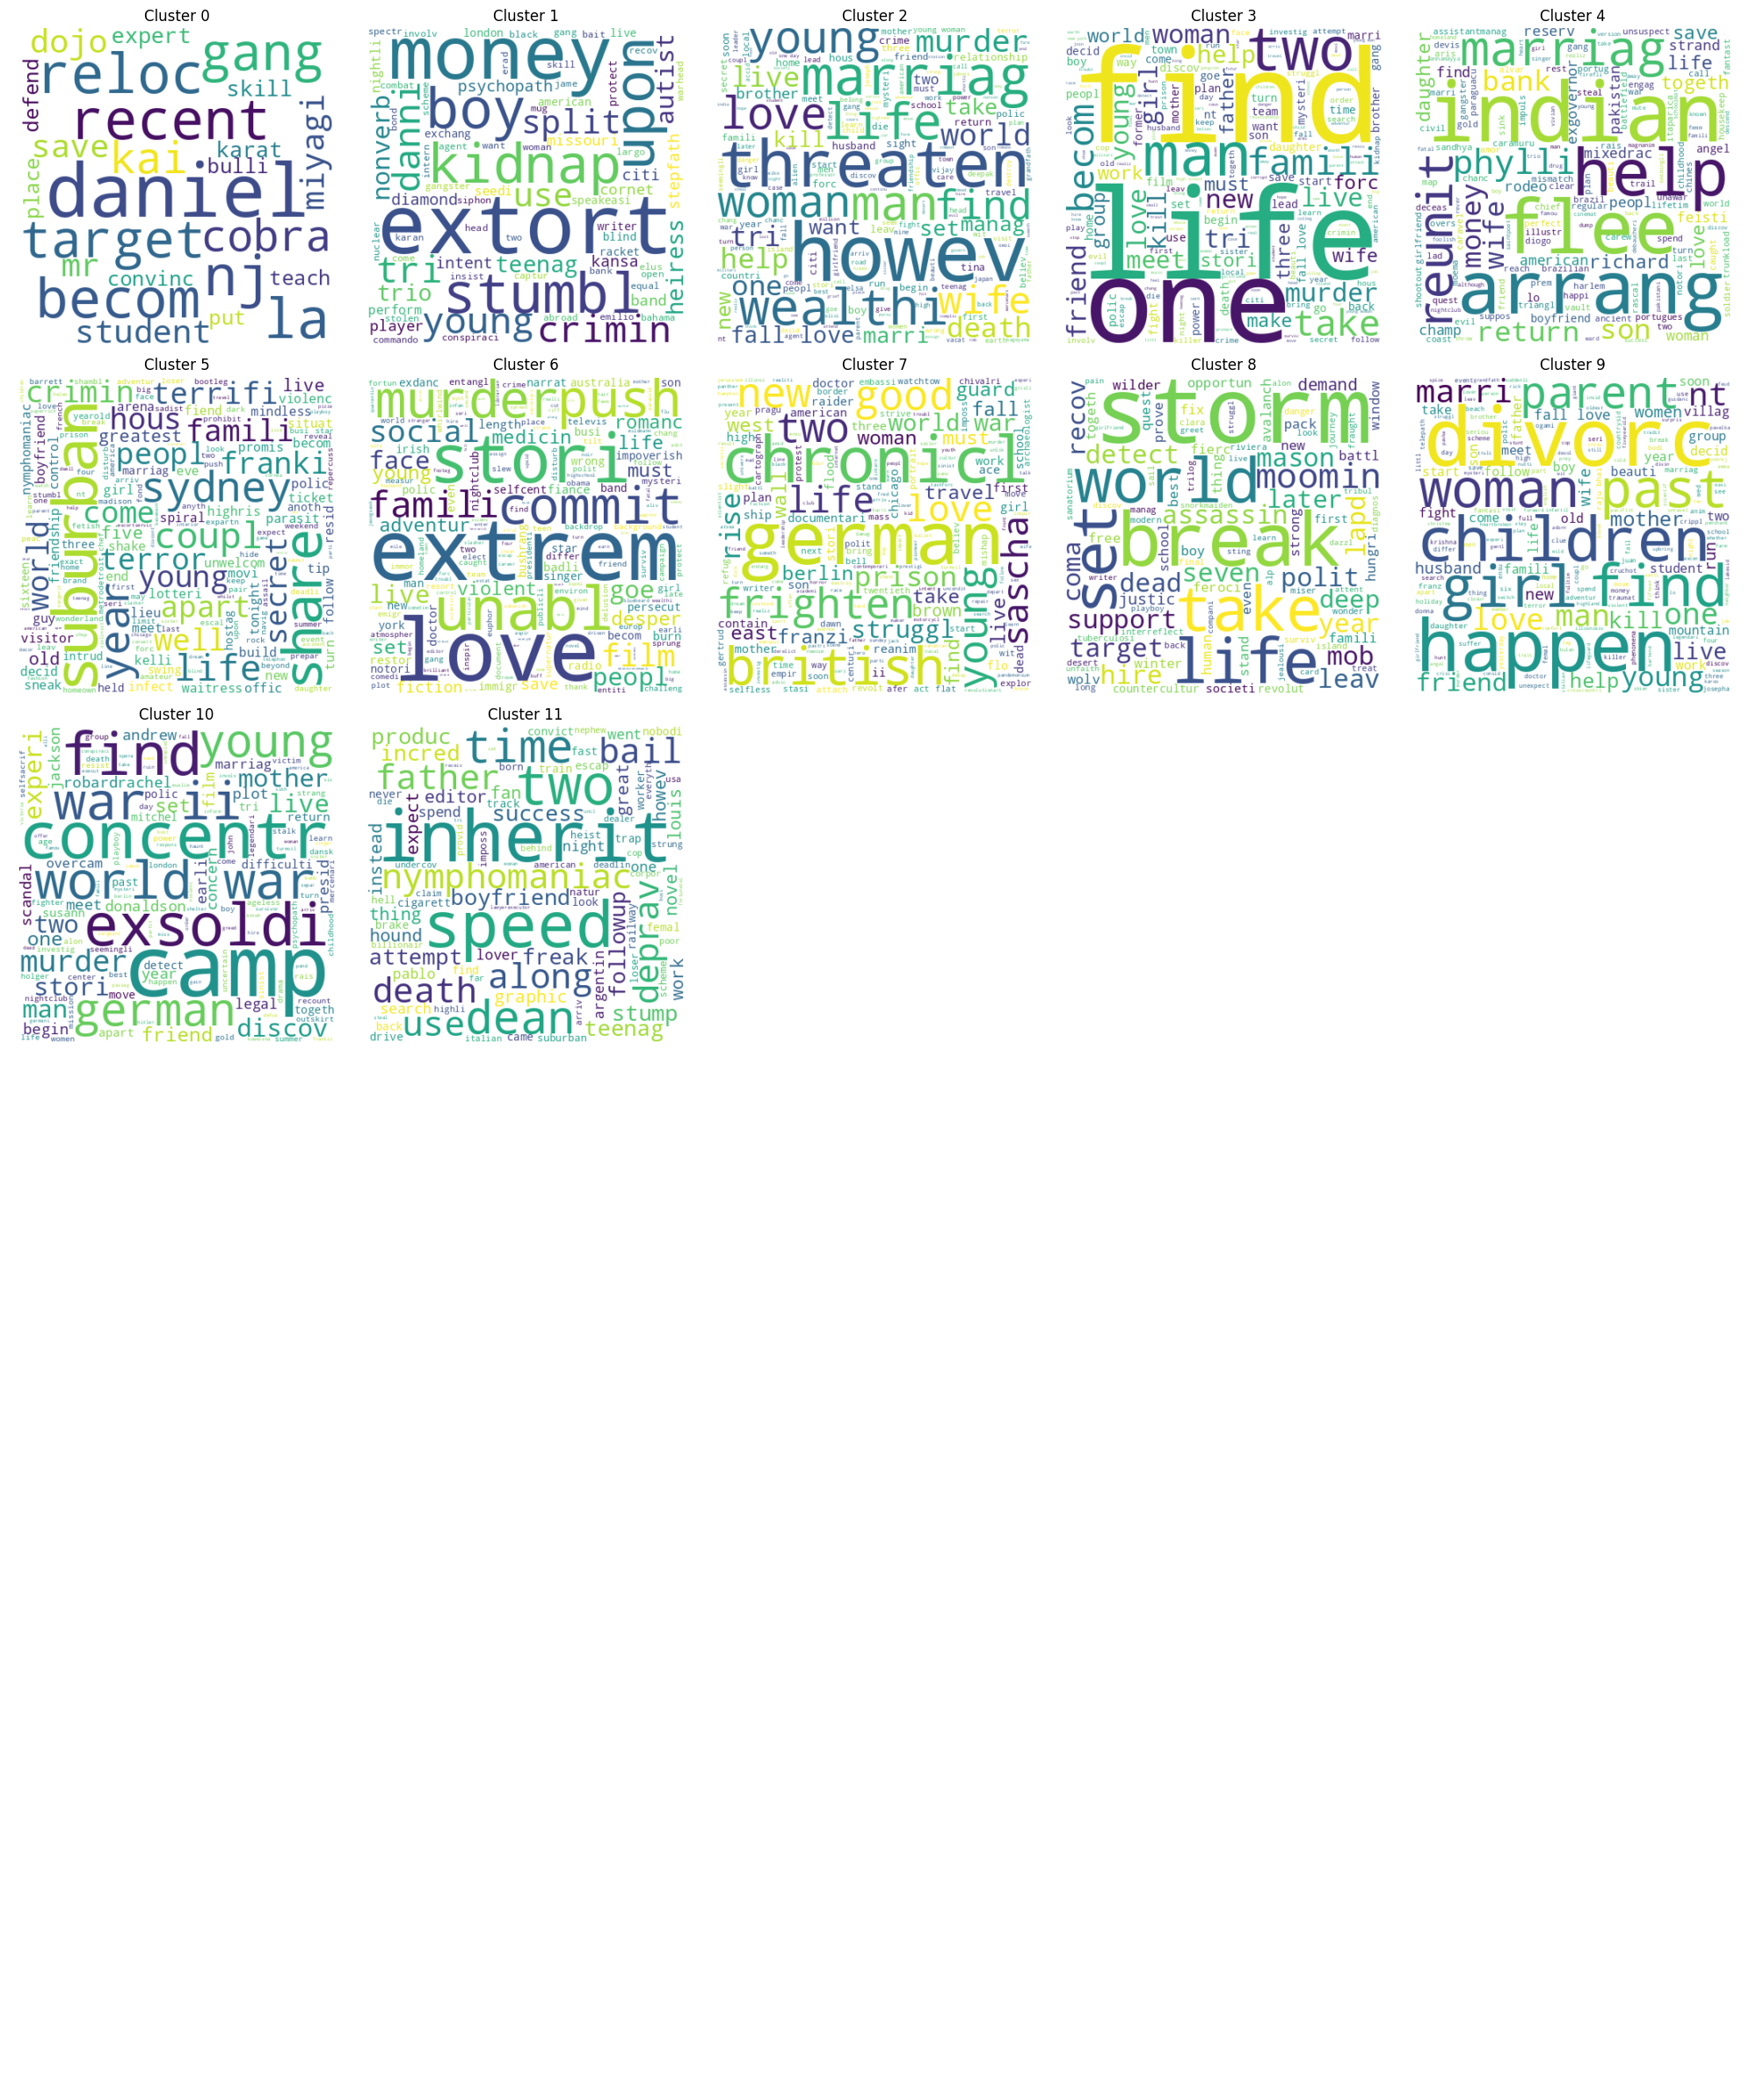

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def word_cloud_plot(clusters, num_plots=5):

  # Organizando palavras em clusters
  cluster_texts = {i: [] for i in range(num_plots)}
  for words, cluster in zip(stemmed_words_list, clusters):
      cluster_texts[cluster].extend(words)

  # Gera e plota a nuvem de palavras para cada cluster
  fig, axes = plt.subplots(6, 5, figsize=(20, 24))
  axes = axes.flatten()

  for i, ax in enumerate(axes):
      if i < num_plots:
          text = " ".join(cluster_texts[i])
          wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)
          ax.imshow(wordcloud, interpolation='bilinear')
          ax.set_title(f"Cluster {i}")
          ax.axis("off")
      else:
          ax.axis("off")

  plt.tight_layout()
  plt.show()

word_cloud_plot(clusters_kmeans, optimal_k)

#### Algoritmo 2

O segundo algoritmo utilizado será o **Agrupamento Hierárquico**.

Primeiramente, é importante escolher o cálculo de distâncias para esse algoritmo. Vamos utilizar o cálculo via *Ward*, um método frequentemento utilizado para minimiza o aumento da variância intra-cluster ao unir dois clusters, escolhendo a fusão que causa o menor aumento na soma dos quadrados dentro do cluster.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Realizando o agrupamento hierárquico com o método de distância Ward
linkage_matrix = linkage(X, method='ward')

Para termos uma visão dos clusters, plota-se um Dendrograma com a matriz de dados gerada.

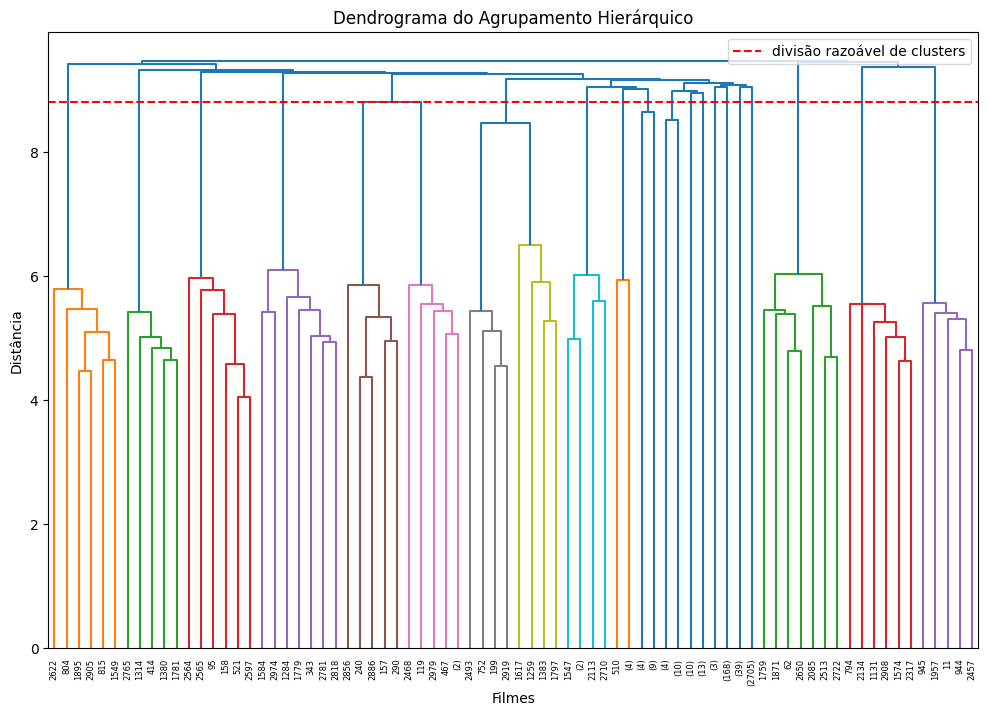

In [ ]:
# Plotando o dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=10)
plt.title("Dendrograma do Agrupamento Hierárquico")
plt.xlabel("Filmes")
plt.ylabel("Distância")
ax = plt.gca()
ax.axhline(y=8.8, color='r', linestyle='--', label='divisão razoável de clusters')
plt.legend()
plt.show()

Com base no dendograma, podemos contar a quantidade de clusters que parece razoável de se começar testando.

In [ ]:
n_clusters = fcluster(linkage_matrix, 8.8, criterion='distance')
num_clusters = len(np.unique(n_clusters))
print(f"Número de clusters escolhidos: {num_clusters}")

Número de clusters escolhidos: 47


Dessa forma, utiliza-se da biblioteca `scikit-learn` para instanciar o Algoritmo de Agrupamento Hierárquico via distâncias de Ward

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MultiLabelBinarizer

# Instanciando o algoritmo com o cálculo de distancia desejado
m = AgglomerativeClustering(num_clusters, linkage='ward')

Com a instância em mãos, aplica-se o agrupamento aos dados, gerando-se os clusters

In [ ]:
# Separando clusters
clusters_hierarquico = m.fit_predict(X);

Agora, assim como feito com o K-Means, vamos plotar os clusters analisando a distribuição de gêneros dentro de cada cluster.


<Figure size 1400x800 with 0 Axes>

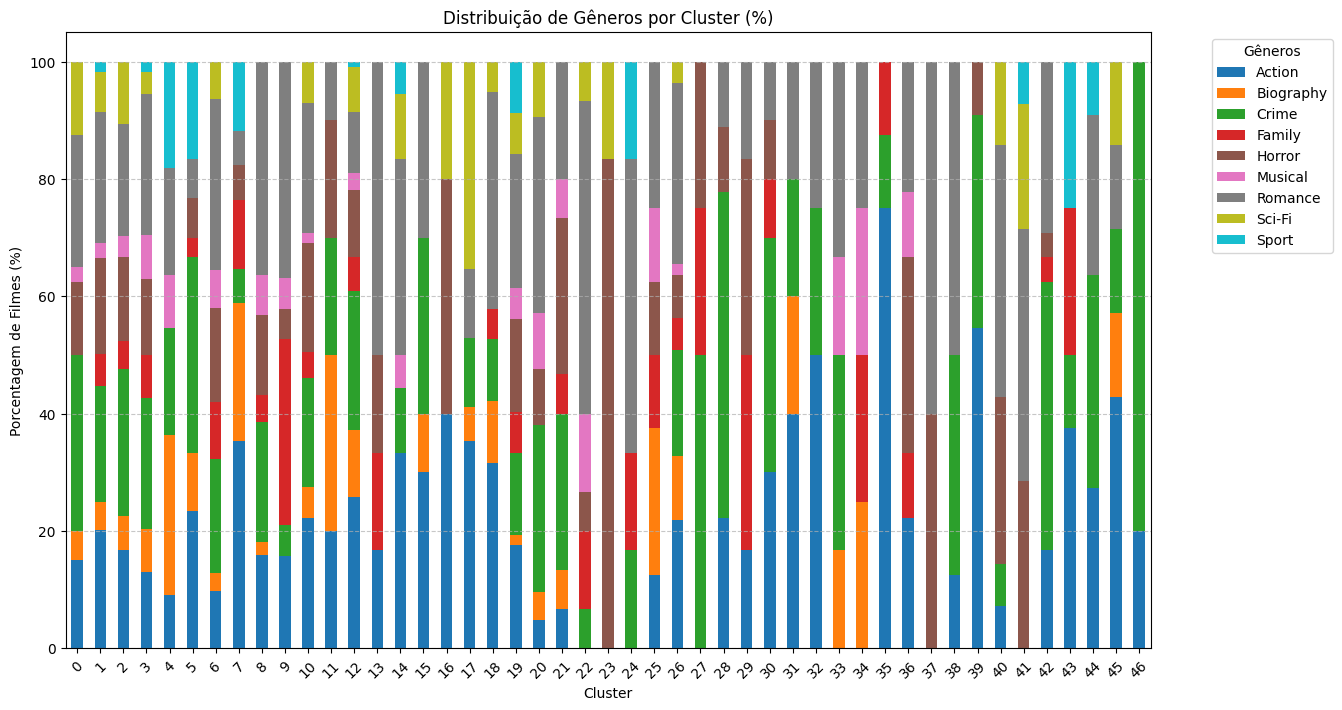

In [ ]:
normalized_bars_plot(clusters_hierarquico)

Agora, vamos testar esse algoritmo usando o mesmo número de clusters usado no último teste do KMeans, para comparar os dois algoritmos.

In [ ]:
num_clusters = optimal_k

m = AgglomerativeClustering(num_clusters, linkage='ward')
clusters_hierarchy = m.fit_predict(X);

<Figure size 1400x800 with 0 Axes>

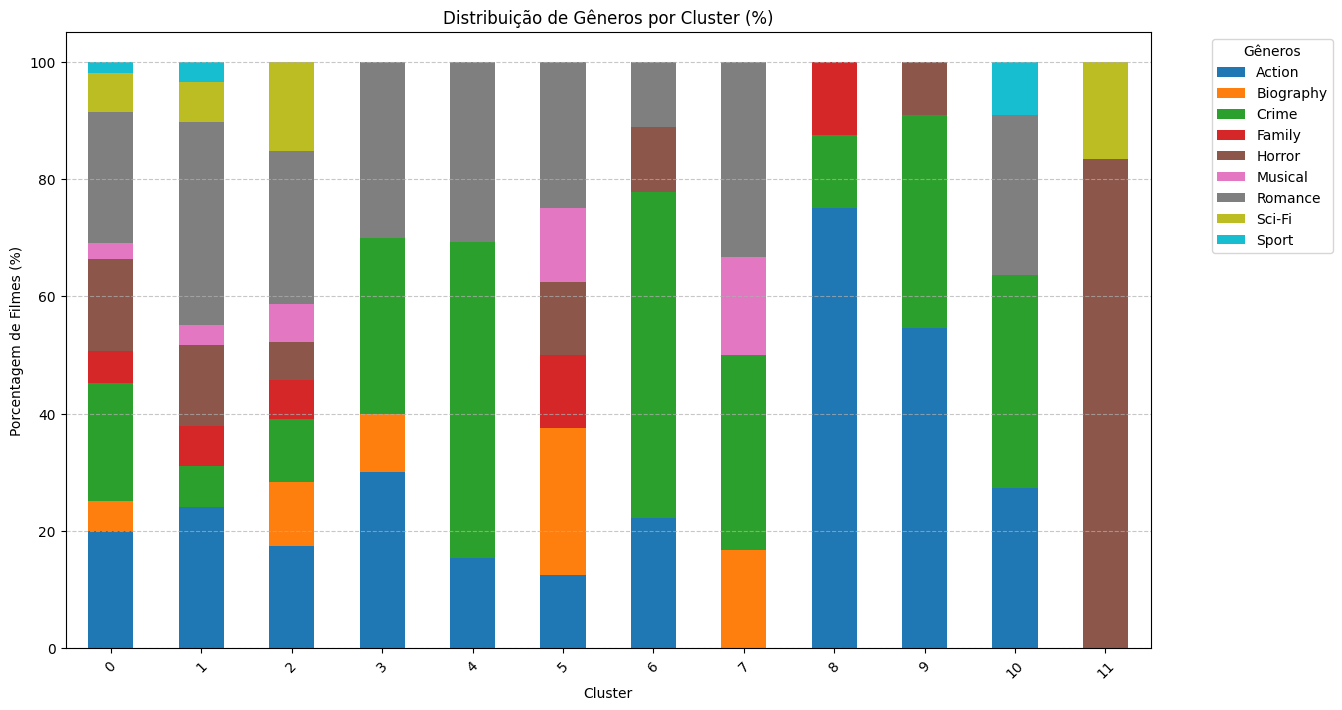

In [ ]:
normalized_bars_plot(clusters_hierarchy)

Igualmente ao KMeans, plota-se a nuvem de palavras novamente.

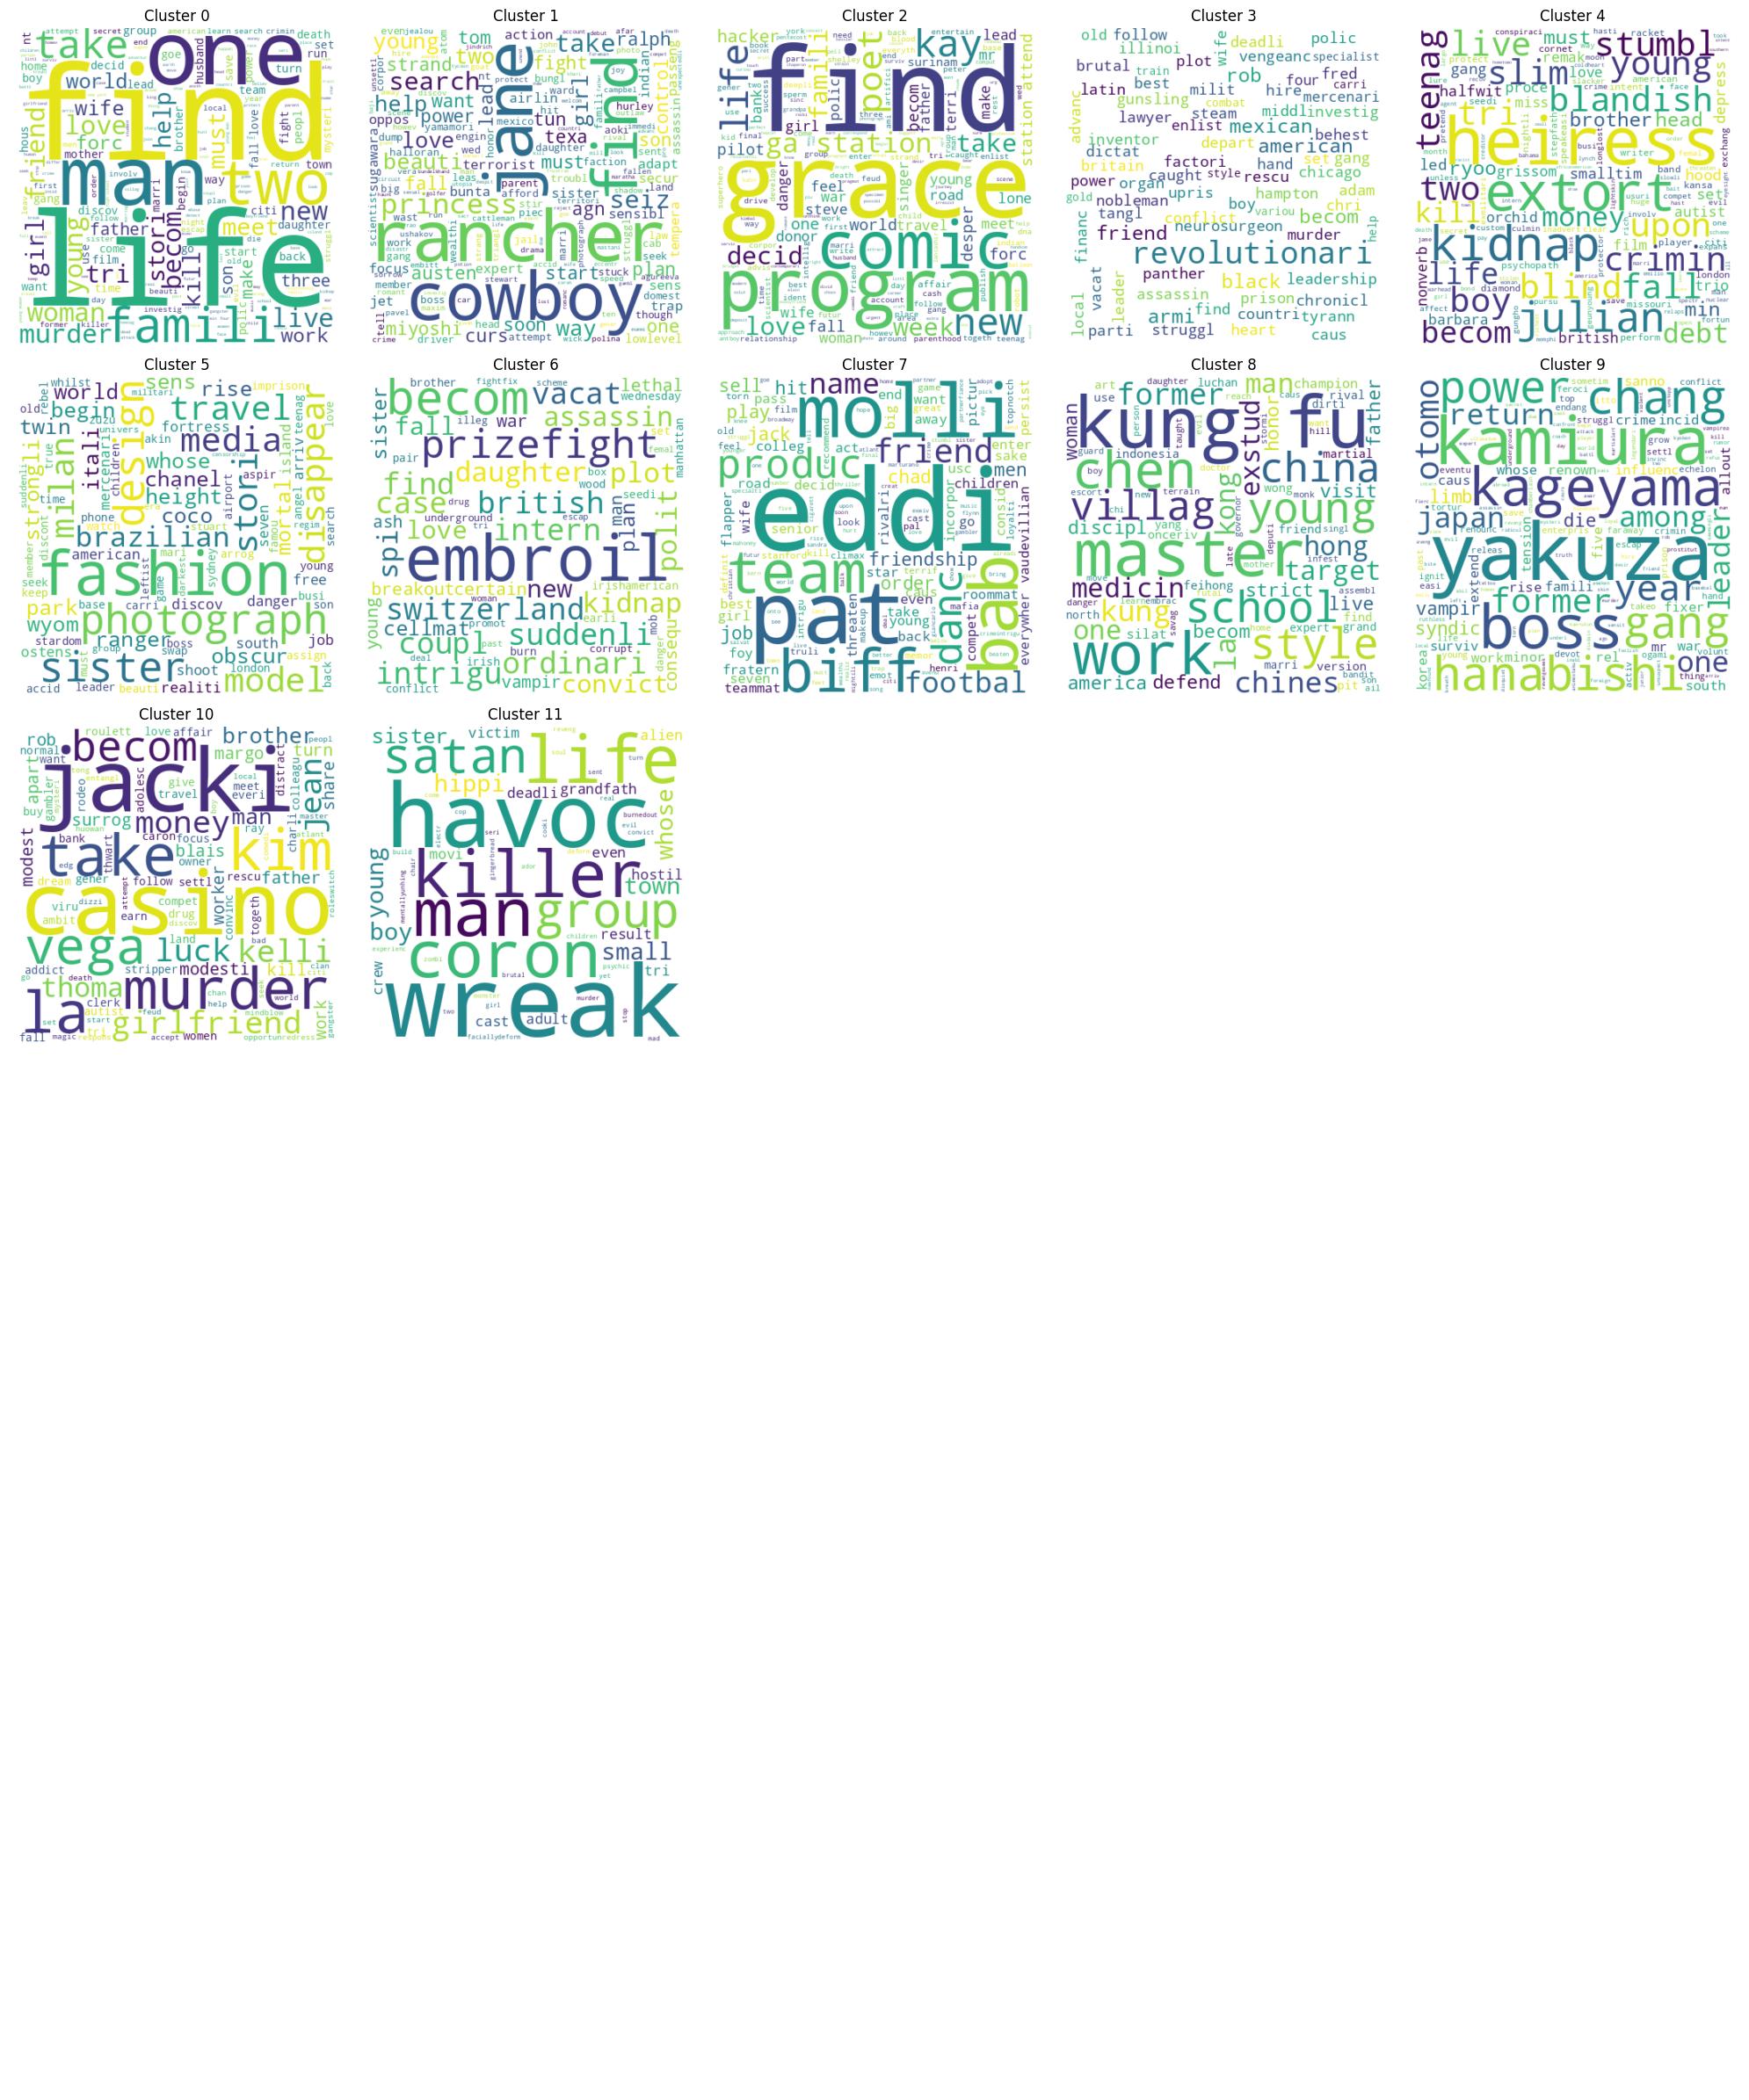

In [ ]:
word_cloud_plot(clusters_hierarchy, num_clusters)

#### Algoritmo 3

O terceiro algoritmo utilizado será o **Agrupamento Espectral**.

Para esse algoritmo, é necessário construir um grafo a partir da nossa matriz de dados. O mais comum, é utilizar-se do método de vizinhos mais próximos, que é brevemente explicado a seguir:

1. Cria-se um vértice para cada elemento nos dados.
2. Conecte cada vértice aos $m$ vértices mais similares.
3. Aplique Agrupamento Espectral no grafo formado.

Observa-se que o método de vizinhos mais próximos (NN) entra justamente como função de similaridade no passo 2.

Por sorte, todo esse raciocínio pode ser abstraído por meio da função presente no `scikit-learn`, definindo a função de similaridade (*affinity*) como *nearest_neighbors*


Também para fins de comparação, vamos utilizar o mesmo número de clusters definido anteriormente para os outros algoritmos, ou seja, 12 clusters.

In [ ]:
print(num_clusters)

12


In [ ]:
from sklearn.cluster import SpectralClustering

# Instanciando o algoritmo e usando o NN como função de similiaridade
spectral = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors')

Em seguida, aplica-se o algoritmo nos dados

In [ ]:
# Separando os clusters
clusters_spectral = spectral.fit_predict(X)

Agora, assim como feito com os outros agrupamentos, vamos gerar um plot dos clusters e analisar a distribuição de gêneros dentro de cada cluster.


<Figure size 1400x800 with 0 Axes>

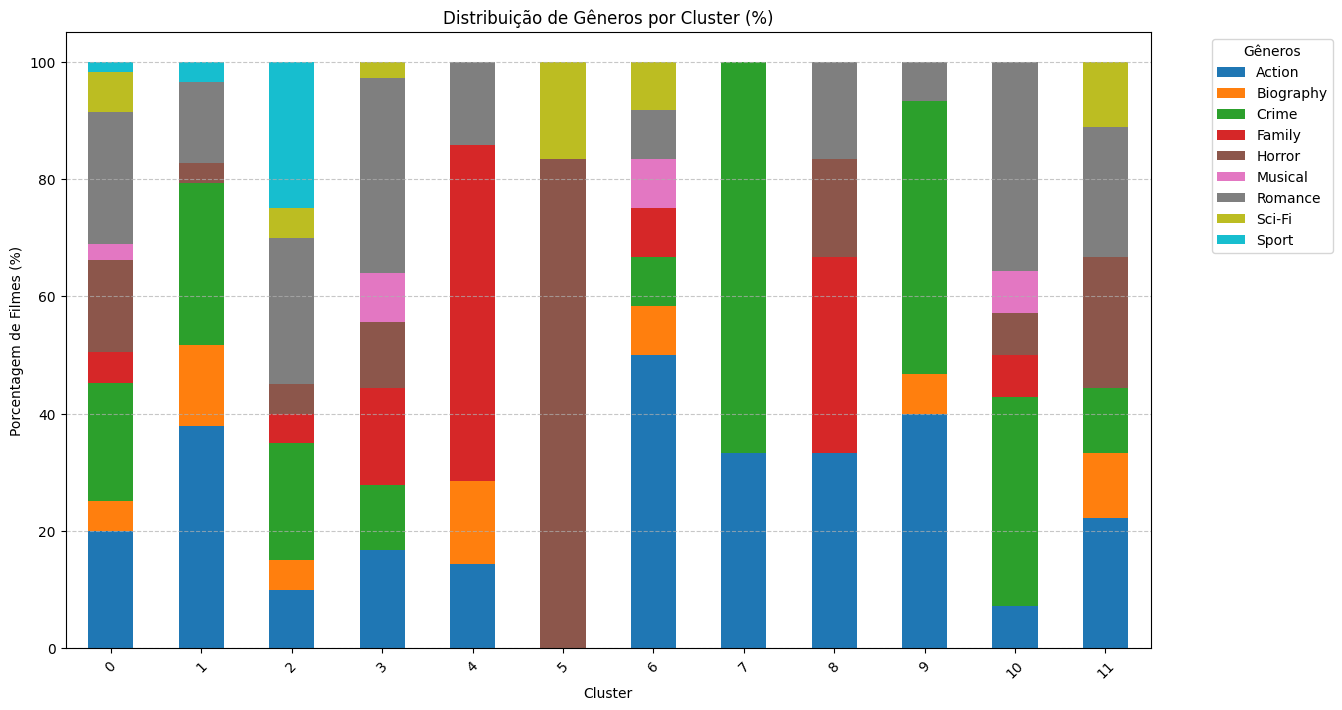

In [ ]:
normalized_bars_plot(clusters_spectral)

Novamente, a nuvem de palavras é plotada para esse agrupamento também.

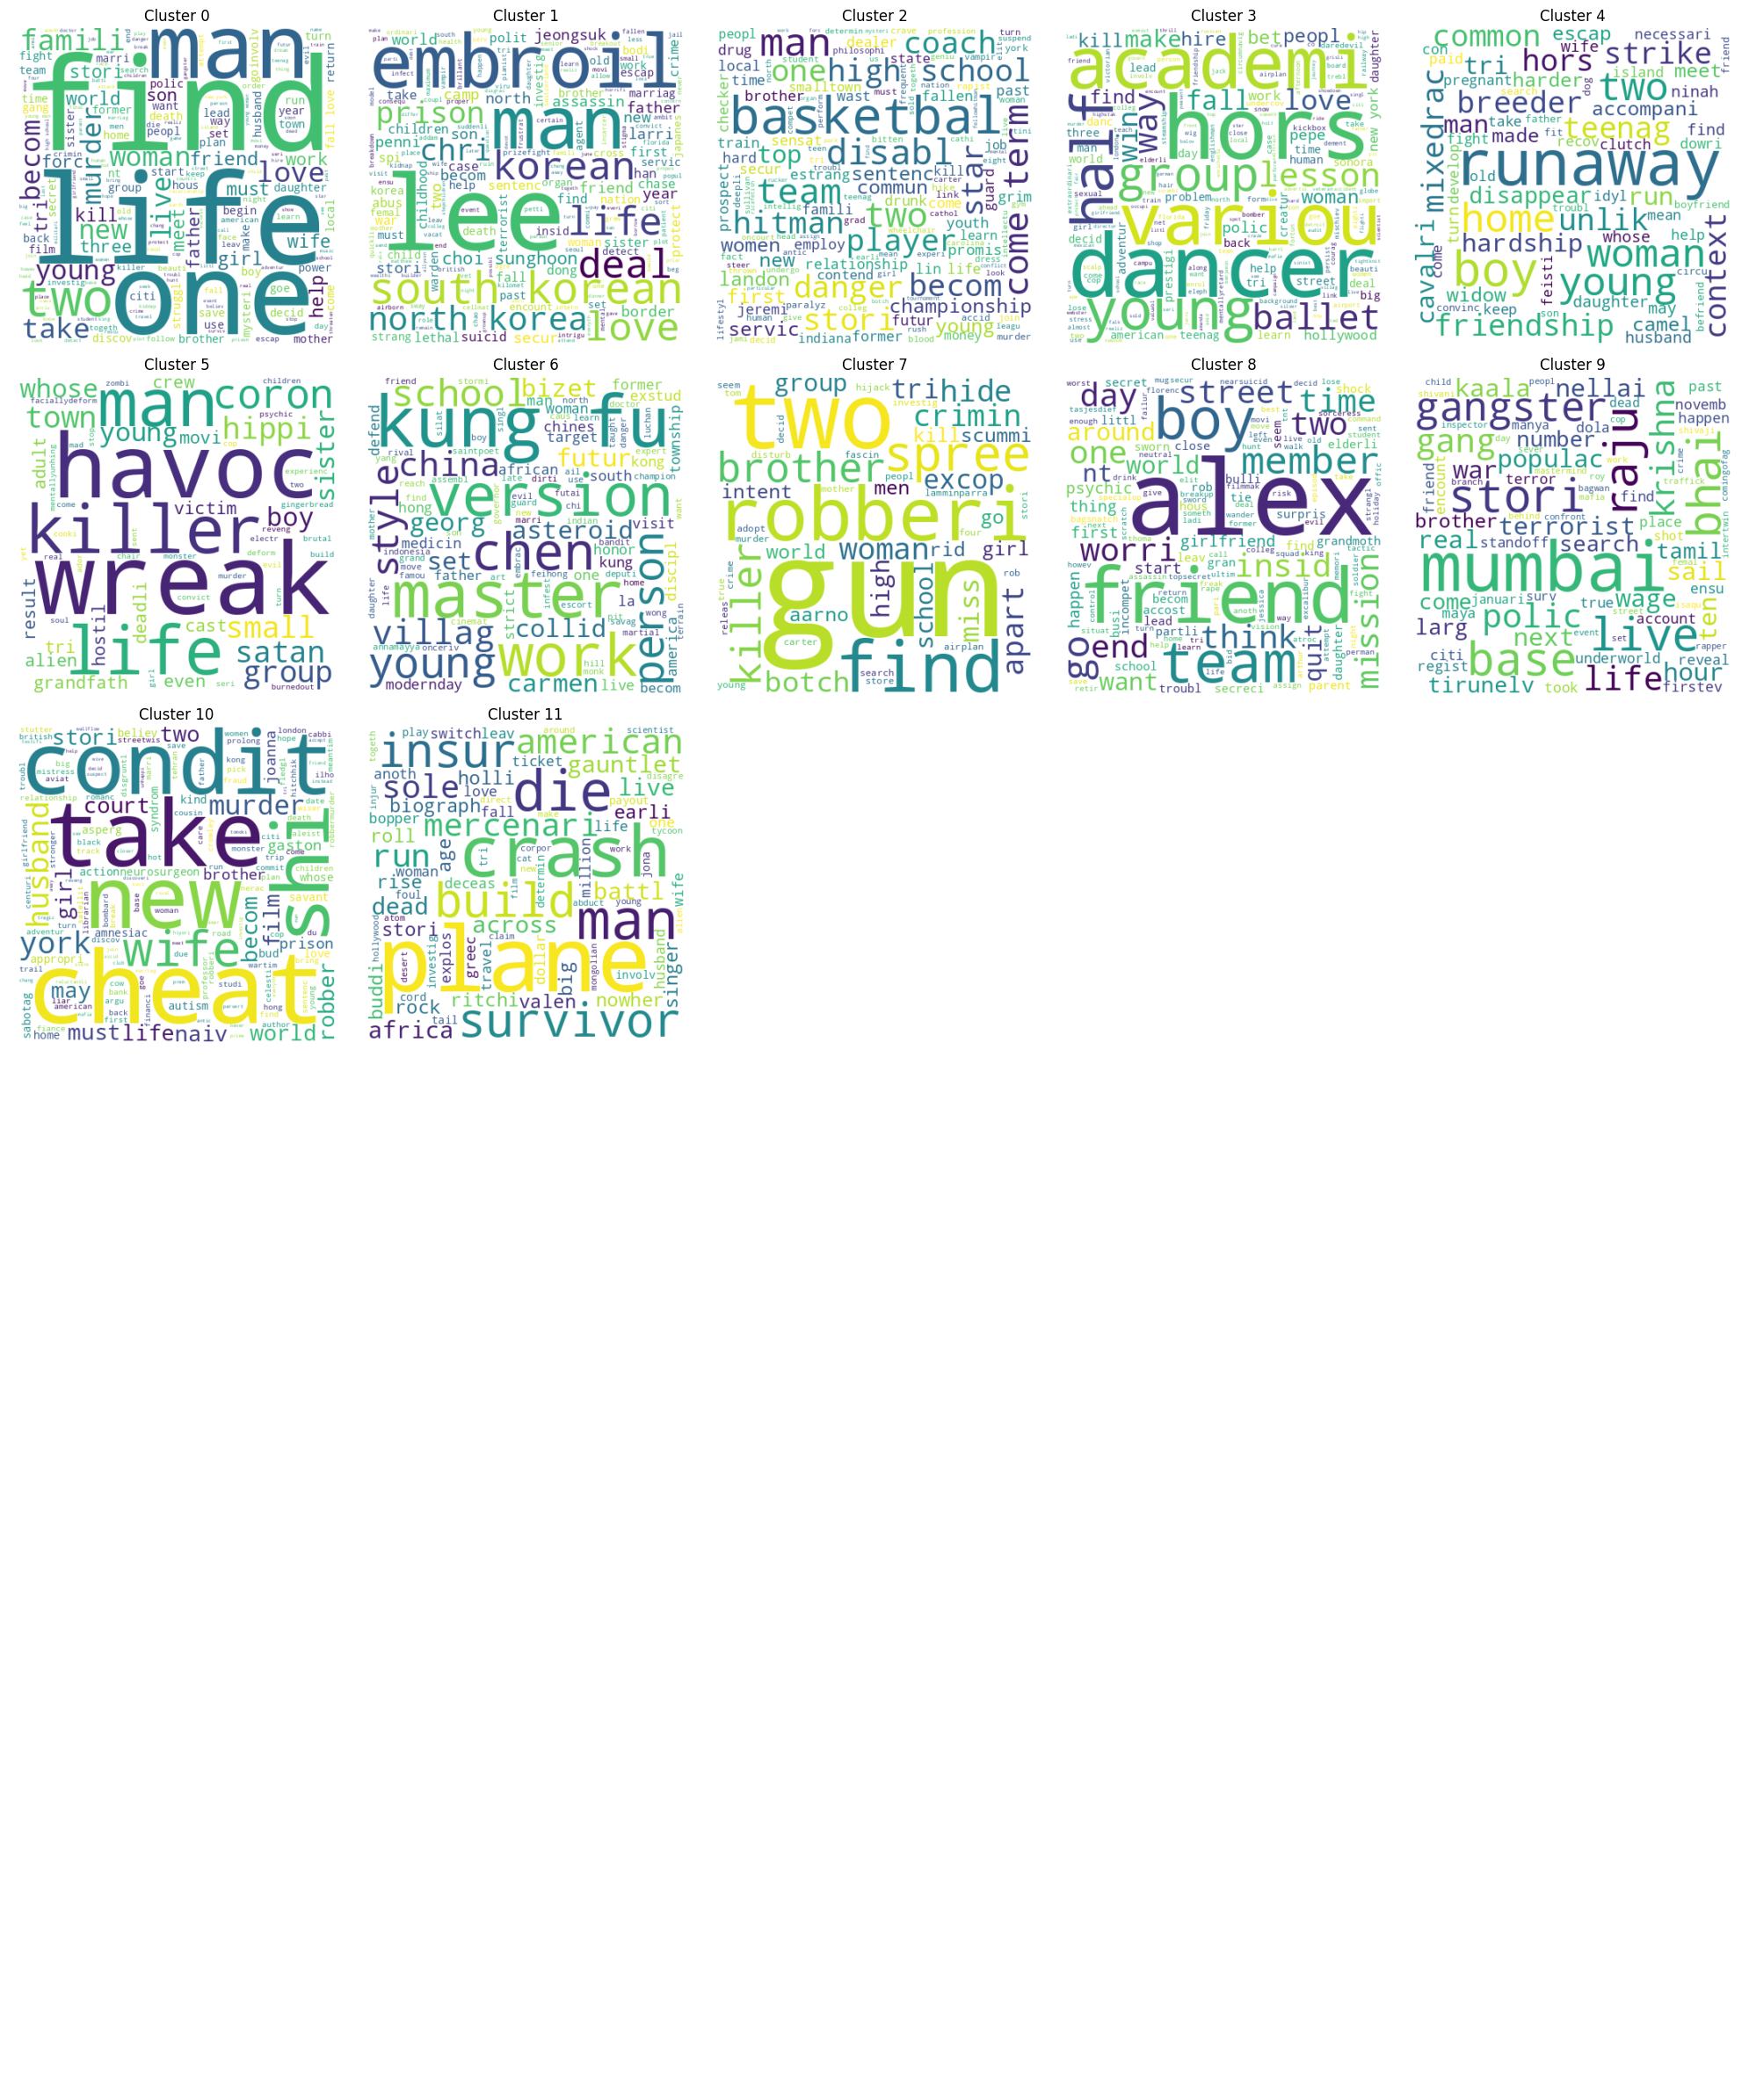

In [ ]:
word_cloud_plot(clusters_spectral, num_clusters)

### Validação da metodologia


**1. Importação e leitura**

Os dados foram importados de um arquivo CSV contendo as informações dos filmes divididas nas colunas sinopse, gêneros, e outras. A coluna sinopse foi selecionada para análise. Além disso, foi extraída apenas uma fração dos dados para ser usada como amostra, escolhendo-se 10% dos dados totais de maneira aleatória. Esse passo se mostrou necessário devido ao grande volume de dados importados do csv, de forma que não era factível compilar e executar o processamento dos dados e os algoritmos, tanto o da redução da dimensionalidade como o do agrupamento.

**2. Tokenização**

As sinopses foram divididas em:
* **Sentenças**: Utilizando *sent_tokenize* para separar as sinopses em frases.
* **Tokens**: Utilizando *word_tokenize* para separar as palavras de cada sinopse.

**3. Tratamento Inicial dos Dados**

Este tratamento preliminar dos dados tem por objetivo garantir que as sinopses estejam em um formato padronizado, livre de ruídos como pontuação, stop words e variações de capitalização. Abaixo, seguem as padronizações aplicadas:

* **Letras minúsculas:** Todas as palavras foram convertidas para minúsculas para uniformidade.
* **Remoção de pontuação:** Caracteres de pontuação foram eliminados.
* **Remoção de acentuação:** A acentuação foi removida para simplificar a análise.
* **Remoção de *stopwords*:** Stop words, como artigos e preposições, foram removidas utilizando a lista padrão da língua inglesa disponibilizada pelo NLTK.
* **Stemmização:** As palavras foram reduzidas aos seus radicais. (Ex.: changed -> chang, changing -> chang, change -> chang).

**4. Array de documentos**

Após o pré-processamento, as palavras de cada sinopse foram unidas novamente em uma string, formando a lista de documentos D agora com os dados limpos

**5. Matriz TF-IDF**

Para representar as sinopses de forma numérica, utilizou-se o **TF-IDF** (Term Frequency-Inverse Document Frequency), uma técnica que destaca palavras importantes em um documento com base em sua frequência relativa. A matriz TF-IDF é uma escolha apropriada para a representação dos dados, pois reduz o impacto de palavras muito comuns e dá maior peso a termos relevantes.

**6. Redução da Dimensionalidade**

Para reduzir a dimensionalidade dos dados, optou-se pelo uso do Truncated SVD que permite que os dados sejam analisados de forma mais eficiente. A quantidade ideal de componentes foi determinada analisando a variância explicada acumulada.

**7. Agrupamentos**

Após a redução de dimensionalidade, utilizou-se de três métodos de agrupamento diferentes para o mesmo banco de palavras, no intuito de compará-los posteriormente. A escolha de parâmetros para cada agrupamento é discutida na próxima seção.

**8. Plotando as distribuições**

Para análise das distribuições de gêneros em cada cluster, utilizou-se do gráfico normalizado em barras verticais e uma nuvem das palavras mais recorrentes. Assim, é possível verificar tanto o quanto cada gênero domina sobre cada cluster, como a 'lógica' seguida pelo algoritmo para fazer a determinada separação, unicamente a partir das sinopses.

### Interpretação dos resultados

#### Validação

**Redução da dimensionalidade**

- *PCA*
  
  O *PCA* não foi utilizado nesta análise, pois sua principal aplicação é a redução de dimensionalidade em dados densos, enquanto a matriz *TF-IDF* gerada neste trabalho é esparsa. Como o PCA depende da decomposição espectral da matriz de covariância, seu desempenho pode ser comprometido quando aplicado diretamente a esse tipo de dado, resultando em um alto custo computacional e possíveis perdas de informações relevantes.

- *Truncated SVD*

  Em contrapartida ao PCA, o *Truncated SVD* faz um trabalho muito bom com os dados esparsos. A escolha do número de componentes principais foi baseada na análise do gráfico de variância explicada acumulada, onde buscou-se um número ideal que garantisse 90-95% de variância acumulada.

> Apesar de não ter sido explicitamente discutida ao longo do trabalho, a escolha do número de componentes principais no Truncated SVD pode ter um impacto significativo nos resultados finais. Como lidamos com dados textuais representados por vetores numéricos de alta dimensionalidade, a redução correta dessa dimensionalidade é crucial. Se a redução for insuficiente, a matriz resultante permanecerá muito grande, aumentando o custo computacional e dificultando tanto a execução dos algoritmos quanto a experimentação com diferentes modelos. Por outro lado, se a redução for excessiva, há o risco de perda de informações essenciais, prejudicando a qualidade do agrupamento ao distorcer a estrutura original dos dados. Portanto, encontrar um equilíbrio entre desempenho e preservação da informação é fundamental para se buscar um resultado satisfatório.

**Agrupamentos — Escolha de parâmetros**
  
- *K-Means*

  Para o algoritmo K-Means, um algoritmo de agrupamento baseado em centroides, o número ótimo de clusters foi determinado analisando, inicialmente, a soma dos quadrados intra-cluster (WCSS). Porém, isso trouxe valores muito altos de clusters (inicialmente em torno de 65-80 clusters) o que tornava a análise pouco prática. Dessa forma, tomou-se o seguinte procedimento iterativo para esse algoritmo:

  - O valor inicial sugerido pelo WCSS foi tomado como referência.
  - Reduziu-se progressivamente o número de clusters.
  - Foram geradas visualizações para avaliar a coerência dos agrupamentos.

  Esse processo possibilitou encontrar $k=12$ como valor "ideal", possibilitando equilíbrio entre granularidade e interpretabilidade dos resultados.

- *Hierárquico*

  Num segundo momento, para o agrupamento hierárquico, o algoritmo que produz um conjunto de grupos aninhados organizados em uma árvore, obteve-se o número ótimo de clusters a partir de dois fatores:
  
  - Iniciou-se analisando o dendrograma na intenção de identificar um ponto onde ainda era possível ver separações claras entre as classes (47), antes de esse número crescer demasiadamente.
  - Depois, testou-se com o número anteriormente utilizado para o KMeans, com o intuito de comparar os resultados posteriormente.

- *Espectral*

  Para o Agrupamento Espectral, utilizou-se do *nearest neighbors* como função de similaridade, pois este é o mais comumente utilizado neste algoritmo. A escolha do hiperparâmetro $m$ foi feita com base no número de clusters utilizado no Kmeans e no Agrupamento Hierárquico, também com o intuito de comparar posteriormente.

**Agrupamentos — Comentários gerais**

Revisitando os gráficos de barras normalizadas para cada agrupamento, tem-se:

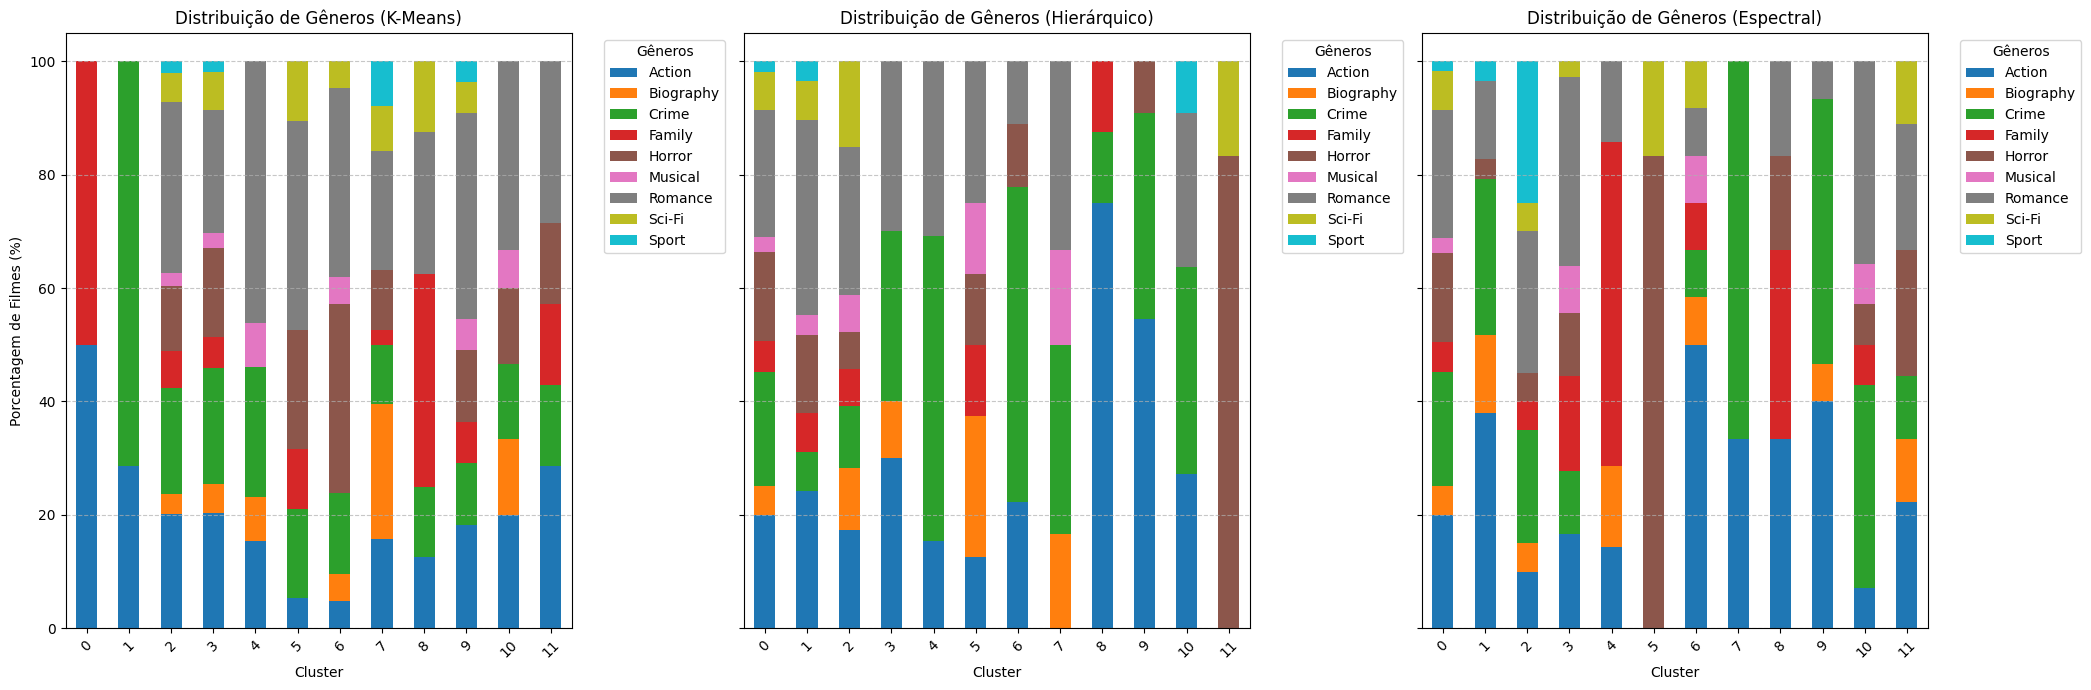

In [ ]:
#@title Comparação das distribuições de cada agrupamento

# Criando subplots para exibir os três gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

# Lista com os diferentes clusters
cluster_methods = {
    "K-Means": clusters_kmeans,
    "Hierárquico": clusters_hierarchy,
    "Espectral": clusters_spectral
}

# Gerar os três gráficos
for ax, (method, clusters) in zip(axes, cluster_methods.items()):
    new_X_df['cluster'] = clusters  # Atribuir os clusters ao DataFrame

    # Contar a ocorrência de cada gênero dentro de cada cluster
    genre_cluster_distribution = new_X_df.groupby('cluster')[mlb.classes_].sum()

    # Normalizar os valores para que a soma de cada cluster seja 100%
    genre_cluster_distribution_normalized = genre_cluster_distribution.div(
        genre_cluster_distribution.sum(axis=1), axis=0
    ) * 100

    # Plotar o gráfico de barras empilhadas
    genre_cluster_distribution_normalized.plot(
        kind="bar", stacked=True, colormap="tab10", ax=ax
    )

    # Configurações do gráfico
    ax.set_title(f"Distribuição de Gêneros ({method})")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Porcentagem de Filmes (%)")
    ax.legend(title="Gêneros", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

Com relação às diferenças nos agrupamentos apontados com cada algoritmo, pode-se perceber:

- O K-Means tende a criar clusters mais homogêneos, ou seja, com poucas diferenças entre cada um. Isso pode indicar que o algoritmo conseguiu identificar padrões bem definidos nos dados.
- O Hierárquico denotou grupos menos homogêneos, porém ainda com certo grau de similariade.
- Já o Espectral formou agrupamentos mais distintos, com segmentos mais diversificados e dominantes. Essa tendência leva a crer que o algoritmo encontrou relações mais complexas entre as sinopses.

#### Análise

Cada algoritmo resultou em agrupamentos com semelhanças e diferenças. Vamos começar pelo o que foi parecido em todos eles.

- Os clusters **1, 9 e 9** do KMeans, Hierárquico e Espectral (respectivamente) são aparentemente
filmes de ação (_Action_) e crime (_Crime_). O porquê desses dois gêneros se encontarem juntos é óbvia: filmes de crime geralmente têm muita ação. Essa relação é tão comum que em quase todos os clusters encontrados (independentemente do algoritmo), filmes de crime estão acompanhados a filmes de ação. Vamos analisar a nuvem de palavras de cada um desses grupos.

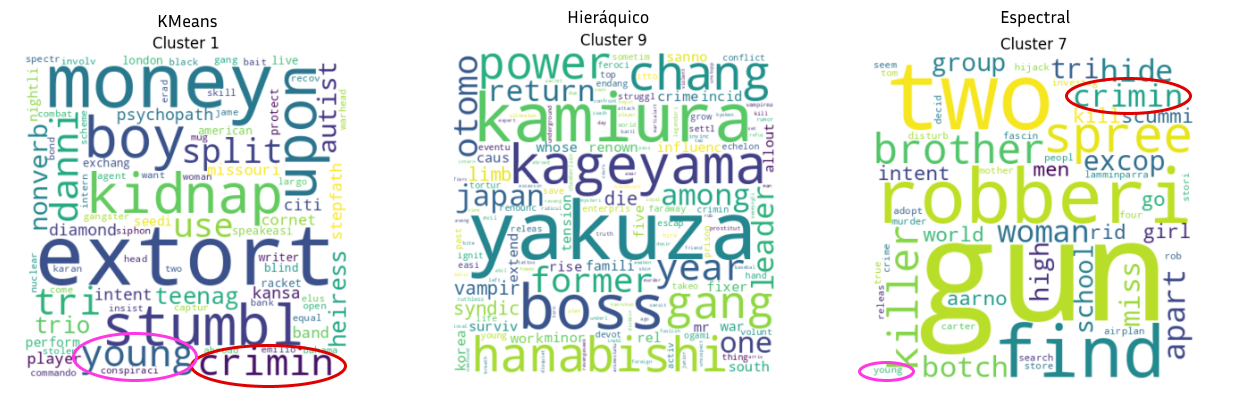

- Analisando cada numvem separadamente, vemos que são palavras que fazem sentido estarem em um contexto de crime/ação, destacando termos como **money, crimin, kidnap, power, boss, gang, war, killer, yakuza, etc**. Além disso, algumas palavras podem ser encontradas em mais de uma das nuvens (círculos em vermelho e rosa na imagem), sendo essas pontos de interseção entre os diferentes algoritmos.

- Romance e horror também são gêneros que foram indentificados como parecidos e estão quase sempre juntos em todos os agrupamentos. Um exemplo são os clusters **6, 0 e 11** do KMeans, Hierárquico e Espectral, respectivamente. Esses gêneros, por serem mais "amplos", vem acompanhados muitas vezes de outros gêneros, como familia (_Family_) e biografia (_Biography_) que por muitas vezes usam o romance como um alicerce da trama, como em _Rebecca (1940)_ do mestre Alfred Hitchcock. Ademais, a própria ação e crime estão relacionados de forma direta com o horror, por motivos óbvios. Vamos dar uma olhada na nuvem de palavras desses clusters.

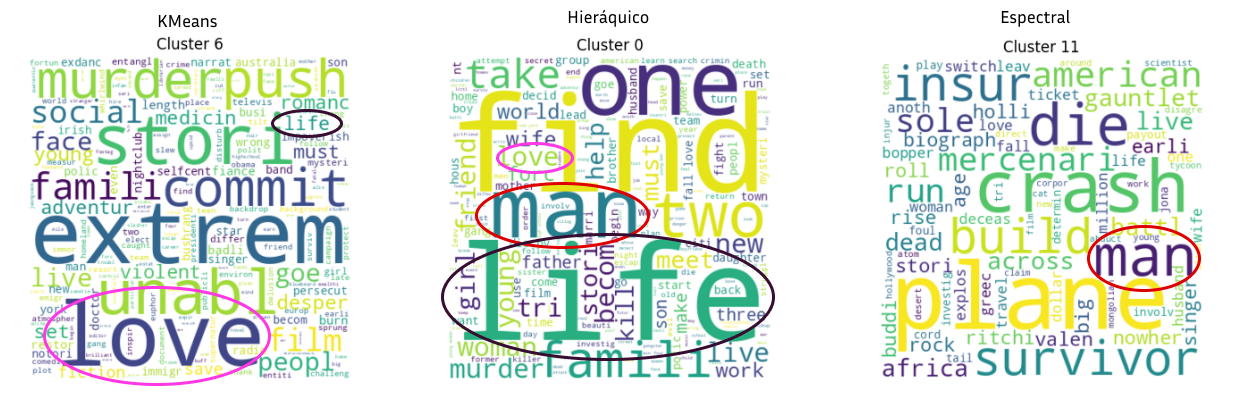

- No geral, vemos que são palavras que fazem sentido estarem em um contexto de romance/horror, destacando termos como **familia, amor, homem, vida, morte, sobrevivente, etc**. Assim como no último caso, palavras podem ser encontradas em mais de uma das nuvens (círculos em vermelho, rosa e preto).

Agora vamos analisar clusters interessantes gerados por cada algoritmo individualmente.
  
- *K-Means*

  O cluster **0** mostra uma predominância de filmes de ação/familia. A não ser que estejamos falando do filme dos _Incríveis (2004)_, essa relação não é trivial. Vamos analisar sua nuvem de palavras para tentar entender a associação.  

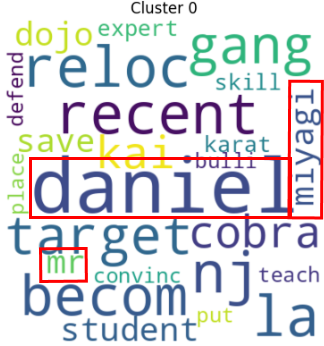

Palavras como **karat, dojo, cobra, gang, defend e skill** sugerem um foco em
artes marciais e confrontos físicos, elementos do gênero de ação. O enredo provavelmente envolve treinamento, lutas e desafios físicos. Já termos como **student, teach e convinc** indicam relações de aprendizado e mentoria, algo típico de histórias voltadas para um público mais amplo, incluindo famílias.
A presença de personagens como **mr (provavelmente referindo-se ao Sr. Miyagi) e daniel** (destacadas em vermelho na imagem) remete a uma narrativa de crescimento pessoal e superação, temas comuns em filmes familiares.

- *Hierárquico*

  O cluster **11** destaca filmes de horror e ficção científica (_Sci-Fi_). Essa dupla já fez muito sucesso em clássicos dos anos 80, como em _Alien, o 8.º Passageiro (1979)_ e em _O Enigma de Outro Mundo (1982)_.

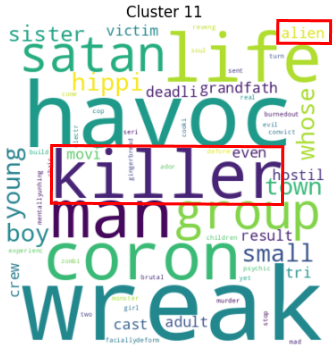

Palavras como **killer, havoc, wreak, satan, victim, murder, e brutal** indicam temas de violência, caos e forças malignas, muito comuns em filmes de terror. Já palavras como **alien, hostil, result, e psychic** remetem a temas da ficção científica, como os próprios alienígenas, experiências científicas e poderes paranormais.

- *Espectral*

  Nesse agrupamento, além de também ter encontrado um cluster com muito terror e ficção científica, também encontrou um com predominância em familia e biografia (cluster **4**). Como já citado anteriormente, esses dois gêneros são comuns na indústria do cinema, onde por muitas vezes a história de uma pessoa gira em torno de uma história de romance. Vamos também relembrar sua nuvem de palavras.

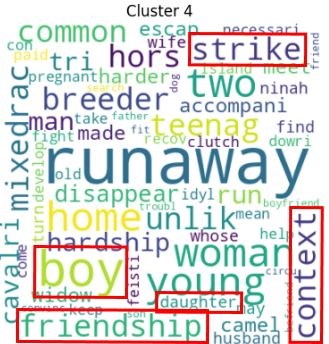

**boy, young, teenag, home, friendship e woman** são palavras que sugerem histórias centradas em crianças, adolescentes e suas relações familiares ou de amizade. Já **strike, hardship, context, e unlik** indicam que alguns filmes abordam dificuldades e superação, temas comuns em cinebiografias. Como exemplificação, _À Procura da Felicidade (2006)_, baseado na história real de Chris Gardner, conta todo o trama de um pai solo que enfrenta dificuldades financeiras extremas enquanto tenta oferecer um futuro melhor para seu filho, unindo de forma clara os gêneros de familia e biografia.